* q-learning

In [2]:
import gym
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from tqdm import tqdm

100%|██████████| 20000/20000 [00:20<00:00, 960.95it/s] 


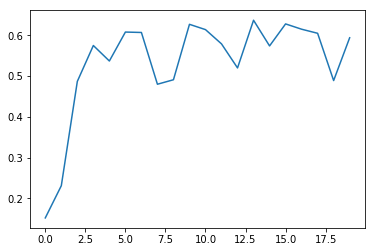

In [4]:
env = gym.make("FrozenLake-v0")
n_obs = env.observation_space.n
n_act = env.action_space.n

q = np.zeros([n_obs, n_act])

epoch_cnt = 20000
max_steps = 200
epsilon = 0.001
gamma = 0.9
alpha = 0.9
 
rewards = np.zeros(epoch_cnt)

for epoch in tqdm(range(epoch_cnt)):
    
    pobs = env.reset()
    done = False
    
    for step in range(max_steps):
        
        pact = np.argmax(q[pobs, :])
        pact = np.random.choice(np.where(q[pobs, :] == q[pobs, pact])[0])
        if np.random.rand() <= epsilon:
            pact = env.action_space.sample()
            
        obs, reward, done, _ = env.step(pact) # return observation, reward, done, info
        
        if not done:
            q[pobs, pact] += alpha * (reward - q[pobs, pact] + gamma * np.max(q[obs, :]))
        else:
            q[pobs, pact] += alpha * (reward - q[pobs, pact])
            
        pobs = obs
        rewards[epoch] = reward
        if done:
            break
            
rates = np.average(rewards.reshape([epoch_cnt//1000, 1000]), axis = 1)
plt.plot(rates)
plt.show()

In [5]:
!python --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [6]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.10
algopy==0.5.7
altair==2.1.0
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
annoy==1.12.0
appdirs==1.4.3
arrow==0.12.1
asn1crypto==0.22.0
astor==0.7.1
astroid==1.5.3
astropy==2.0.2
atari-py==0.1.1
attrs==18.1.0
audioread==2.1.6
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.1.0
bayesian-optimization==0.6.0
bayespy==0.5.17
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.72
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
blist==1.3.6
bokeh==0.13.0
Boruta==0.1.5
boto==2.48.0
boto3==1.7.54
botocore==1.10.54
Bottleneck==1.2.1
Box2D-kengz==2.3.3
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.0
bz2file==0.98
cachetools==2.1.0
cairocffi==0.8.1
CairoSVG==2.1.3
Cartopy==0.16.0
catboost==0.9.1.1
category-encoders==1.2.8
certifi==2018.4.16
cffi==1.10.0
chainer==4.2.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
clo